# kmeans

1. 중심 포인트(CP1랜덤)로 부터 k(임의지정)개를 그룹화
2. 그 그룹화된 반경 내에서 중심(cp1)과 각 포인트(k-1) 간의 거리(유클리드)의 평균
3. 평균 거리값이 가장 작은 포인트가 중심(cp2)으로 재설정
4. 중심(cp1)는 일반 포인트가 되서 가장 가까운 cp 찾고 반경내로 재그룹이 형성됨
5. 무한 반복 . 포인트의 변경이 없을때까지

In [8]:
from sklearn import datasets
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt
import seaborn as sns
from sklearn.metrics import silhouette_samples, silhouette_score

In [9]:
def myscore(model, X, ncluster) :
    c_coef = silhouette_samples(X, ncluster)
    print(c_coef[:5])
    df["c_coef"] = c_coef

    score = silhouette_score(X, ncluster)
    print(score)
    
    print(f"응집도 : {model.inertia_:.4f}")

In [10]:
iris = datasets.load_iris()
cols = ['Sepal length','Sepal width','Petal length','Petal width']
df = pd.DataFrame(iris.data, columns=cols)
df['target'] =  iris.target
df.head()

,Sepal length,Sepal width,Petal length,Petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
df_2col = df[['Sepal length','Sepal width']]

model = KMeans(n_clusters=3)
model.fit(df_2col)
ncluster = model.predict(df_2col)
df['ncluster'] = ncluster

print(df)

     Sepal length  Sepal width  Petal length  Petal width  target  ncluster
0             5.1          3.5           1.4          0.2       0         2
1             4.9          3.0           1.4          0.2       0         2
2             4.7          3.2           1.3          0.2       0         2
3             4.6          3.1           1.5          0.2       0         2
4             5.0          3.6           1.4          0.2       0         2
..            ...          ...           ...          ...     ...       ...
145           6.7          3.0           5.2          2.3       2         0
146           6.3          2.5           5.0          1.9       2         1
147           6.5          3.0           5.2          2.0       2         0
148           6.2          3.4           5.4          2.3       2         0
149           5.9          3.0           5.1          1.8       2         1

[150 rows x 6 columns]


In [12]:
model.cluster_centers_

array([[6.81276596, 3.07446809],
       [5.77358491, 2.69245283],
       [5.006     , 3.428     ]])

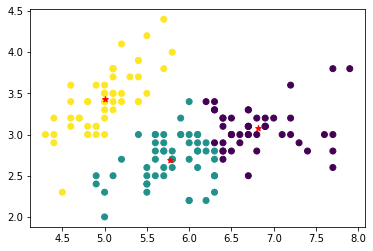

In [14]:
centers = pd.DataFrame(model.cluster_centers_,columns=['Sepal length','Sepal width'])
center_x = centers['Sepal length']
center_y = centers['Sepal width']

# scatter plot
plt.scatter(df['Sepal length'],  df['Sepal width'], c=df["ncluster"] )
plt.scatter(center_x, center_y,  marker='*'      ,  c='r')
plt.show()

In [15]:
df.head()

,Sepal length,Sepal width,Petal length,Petal width,target,ncluster
0,5.1,3.5,1.4,0.2,0,2
1,4.9,3.0,1.4,0.2,0,2
2,4.7,3.2,1.3,0.2,0,2
3,4.6,3.1,1.5,0.2,0,2
4,5.0,3.6,1.4,0.2,0,2


In [16]:
myscore(model, df[['Sepal length','Sepal width']], df["ncluster"])

[0.59821502 0.40612542 0.56116222 0.50873385 0.62315302]
0.4450525692083638
응집도 : 37.0507


In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
scaler_val = scaler.fit_transform(df[['Sepal length','Sepal width']])
# df_scaler = pd.DataFrame(scaler_val, columns = ['Sepal length','Sepal width'])
# df_scaler.head()
df[["separl_length_sacle", "separ_with_scale"]] = scaler_val

In [19]:
df.head()

,Sepal length,Sepal width,Petal length,Petal width,target,ncluster,c_coef,separl_length_sacle,separ_with_scale
0,5.1,3.5,1.4,0.2,0,2,0.598215,-0.900681,1.019004
1,4.9,3.0,1.4,0.2,0,2,0.406125,-1.143017,-0.131979
2,4.7,3.2,1.3,0.2,0,2,0.561162,-1.385353,0.328414
3,4.6,3.1,1.5,0.2,0,2,0.508734,-1.506521,0.098217
4,5.0,3.6,1.4,0.2,0,2,0.623153,-1.021849,1.249201


In [20]:
df_2col = df[ ['separl_length_sacle', 'separ_with_scale']]

# model = KMeans(n_clusters=3)
model.fit(df_2col)
ncluster = model.predict(df_2col)
df['ncluster_scaler'] = ncluster

In [21]:
df.head()

,Sepal length,Sepal width,Petal length,Petal width,target,ncluster,c_coef,separl_length_sacle,separ_with_scale,ncluster_scaler
0,5.1,3.5,1.4,0.2,0,2,0.598215,-0.900681,1.019004,1
1,4.9,3.0,1.4,0.2,0,2,0.406125,-1.143017,-0.131979,1
2,4.7,3.2,1.3,0.2,0,2,0.561162,-1.385353,0.328414,1
3,4.6,3.1,1.5,0.2,0,2,0.508734,-1.506521,0.098217,1
4,5.0,3.6,1.4,0.2,0,2,0.623153,-1.021849,1.249201,1


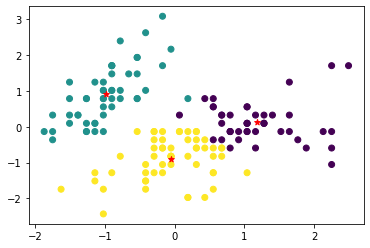

In [22]:
centers = pd.DataFrame(model.cluster_centers_,columns=['separl_length_sacle','separ_with_scale'])
center_x = centers['separl_length_sacle']
center_y = centers['separ_with_scale']

# scatter plot
plt.scatter(df['separl_length_sacle'],  df['separ_with_scale'], c=df["ncluster_scaler"] )
plt.scatter(center_x, center_y,  marker='*'      ,  c='r')
plt.show()

In [23]:
myscore(model, df[['separl_length_sacle','separ_with_scale']], df["ncluster_scaler"])

[0.63870773 0.20166077 0.50275692 0.40644779 0.64752337]
0.43721141375168143
응집도 : 102.6177


# 최적 군집 갯수는 몇개?

In [24]:
NS = [2,3,4,5,6]
df_2col = df[ ['separl_length_sacle', 'separ_with_scale']]
for n in NS:
    model = KMeans(n_clusters=n)
    model.fit(df_2col)
    ncluster = model.predict(df_2col)
    print(n, "--"*15)
    myscore(model, df_2col, ncluster)
    centers_list.append(model.cluster_centers_)

2 ------------------------------
[0.64958336 0.37216381 0.57234994 0.5063326  0.65414918]
0.4478710793874113
응집도 : 166.9517
3 ------------------------------
[0.64454259 0.20026949 0.50849325 0.41000468 0.65368182]
0.4343127417012513
응집도 : 102.6169
4 ------------------------------
[0.22911133 0.48610625 0.65988978 0.62591115 0.00344119]
0.4110181469480815
응집도 : 79.7714
5 ------------------------------
[0.32757644 0.4407031  0.66738234 0.60350322 0.04172398]
0.40101188632513224
응집도 : 61.8092
6 ------------------------------
[0.2951931  0.45255062 0.66960864 0.61547881 0.01724093]
0.3942293956885734
응집도 : 52.2189


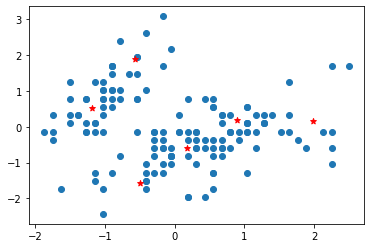

In [30]:
centers = pd.DataFrame(model.cluster_centers_,columns=['separl_length_sacle','separ_with_scale'])
center_x = centers['separl_length_sacle']
center_y = centers['separ_with_scale']

# scatter plot
plt.scatter(df['separl_length_sacle'],  df['separ_with_scale'] )
plt.scatter(center_x, center_y,  marker='*'      ,  c='r')
plt.show()

# 검증

In [26]:
ctab = pd.crosstab(df["target"],df["ncluster_scaler"])
print(ctab)

ncluster_scaler   0   1   2
target                     
0                 0  49   1
1                13   1  36
2                31   0  19


In [27]:
from scipy.cluster.hierarchy import linkage, dendrogram

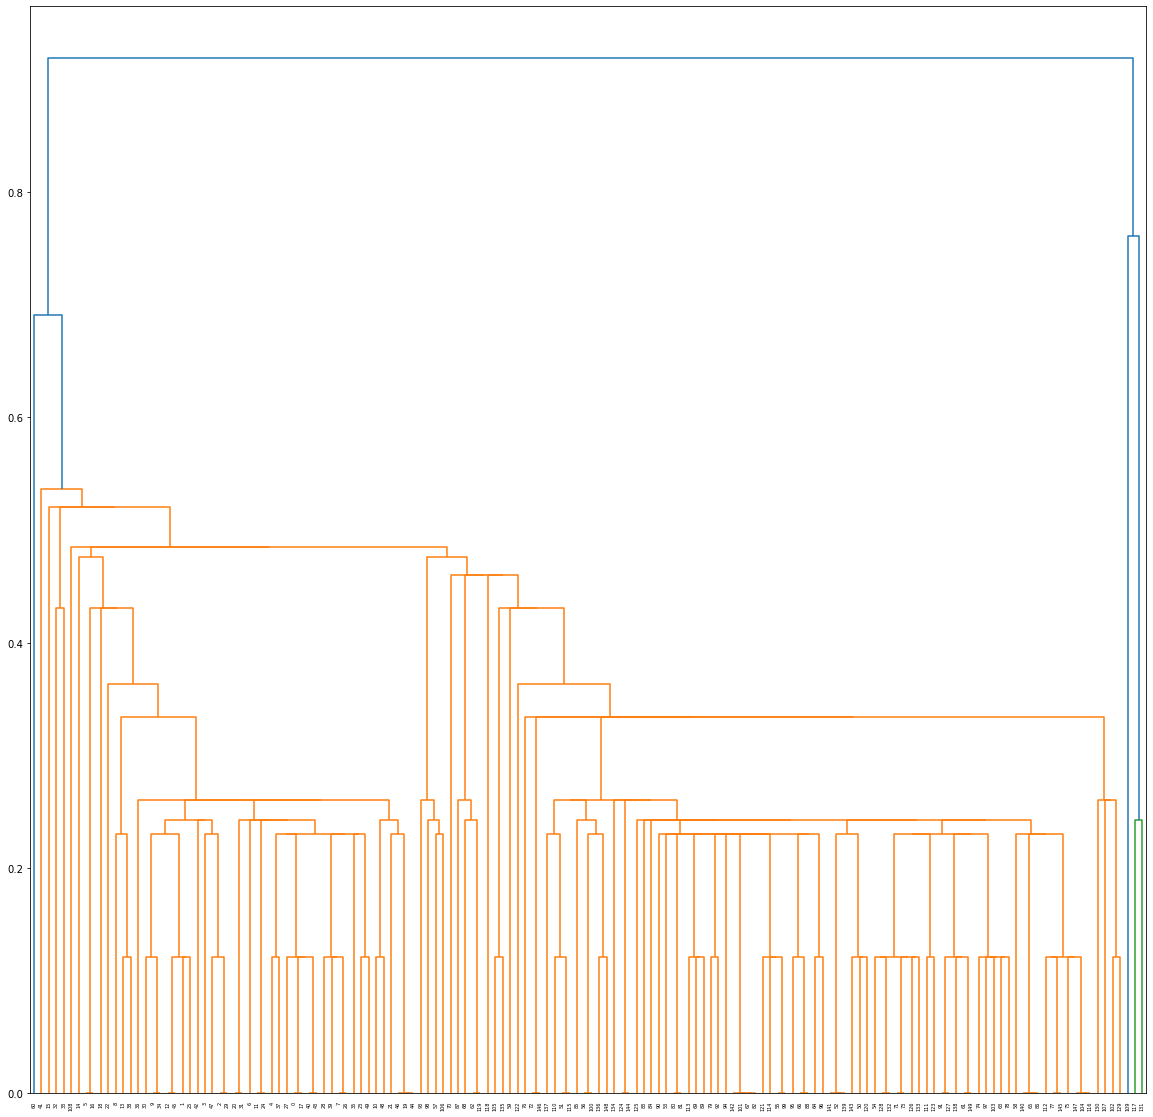

In [31]:
plt.figure(figsize=(20,20))
#y, method='single', metric='euclidean',
matrix = linkage(df[['separl_length_sacle','separ_with_scale']], method='single', metric='euclidean')
dendrogram(matrix)
plt.show()
